## 1.Setup and Load Data

## 1.1 install Dependencies and Setup

In [114]:
!pip list

Package                           Version
--------------------------------- --------------------
absl-py                           2.1.0
aniso8601                         9.0.1
annotated-types                   0.6.0
antlr4-python3-runtime            4.9.3
anyio                             4.2.0
api                               0.0.7
appdirs                           1.4.4
APScheduler                       3.10.4
argon2-cffi                       23.1.0
argon2-cffi-bindings              21.2.0
arrow                             1.3.0
asgiref                           3.7.2
assemblyai                        0.26.0
astroid                           3.0.2
asttokens                         2.4.1
astunparse                        1.6.3
async-lru                         2.0.4
attrs                             23.2.0
Babel                             2.14.0
backoff                           2.2.1
beautifulsoup4                    4.12.2
bkmeans                           1.2
black             


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import tensorflow as tf


gpus = tf.config.experimental.list_logical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)

In [3]:
import cv2
import imghdr
import os
import matplotlib.pyplot as plt

C:\Users\SunInternet.ir\AppData\Local\Temp\ipykernel_17276\3767561767.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [4]:
data_dir = 'picture'
image_exts = ['jpeg','jpg','bmp','png']

In [5]:
image_exts


['jpeg', 'jpg', 'bmp', 'png']

In [6]:
image_exts[2]

'bmp'

In [7]:
os.listdir(os.path.join(data_dir,'happy'))

['05-12-21-happy-people.jpg',
 '1000_F_165246984_Ihe5LVattiq8zEPivcPqrtM85x7noWJw.jpg',
 '1000_F_257759165_m9yldegJvu8gPi8lOHDM0mwP8LejhmKK.jpg',
 '1000_F_42220133_toAU6USGY9jVr2XJFLssfG00cSYIJ173.jpg',
 '1920px-face-smile.svg_.png',
 '20150413185238-secrets-happy-entrepreneurs-woman-gratitude-rainbow-.jpeg',
 '35438_hd.jpg',
 '360_F_237330799_fynB7PDF8qXuq2qYTEKOa6E0Lt8Vbzv6.jpg',
 '360_F_313450534_bHkt5SoetREYpgWO5uOpceVnaDCngOX7.jpg',
 '360_F_484873483_hg1ofIdXbMha5lKEDG3hJBrwKh1oikTq.jpg',
 '4239f3d51d092f69d529f372a37b4601.jpg',
 '5400ea_cd54b25fdd2a4216819fe49413f0c976mv2.png',
 '56f457a01e0000b30070547b.jpeg',
 '71hBPTAhIXL._AC_UF10001000_QL80_.jpg',
 '7VR73K6EP5ETVEOUFANWBUYJEQ.jpg',
 '9-habits-of-incredibly-happy-people-800x436.jpg',
 '960x0.jpg',
 'aecd7b04-bb40-42ad-9985-d63a3198a878.jpg',
 'A_Sep20_14_1189155141.jpg',
 'business-people-succesful-celebrating-group-successful-39416686-800x500.jpg',
 'businesswoman-giving-high-five-male-260nw-2226244055.jpg',
 'Copy-of-Rustic-

In [8]:
for image_class in os.listdir(data_dir):
    print(image_class)
    for image in os.listdir(os.path.join(data_dir,image_class)):
        print(image)

happy
05-12-21-happy-people.jpg
1000_F_165246984_Ihe5LVattiq8zEPivcPqrtM85x7noWJw.jpg
1000_F_257759165_m9yldegJvu8gPi8lOHDM0mwP8LejhmKK.jpg
1000_F_42220133_toAU6USGY9jVr2XJFLssfG00cSYIJ173.jpg
1920px-face-smile.svg_.png
20150413185238-secrets-happy-entrepreneurs-woman-gratitude-rainbow-.jpeg
35438_hd.jpg
360_F_237330799_fynB7PDF8qXuq2qYTEKOa6E0Lt8Vbzv6.jpg
360_F_313450534_bHkt5SoetREYpgWO5uOpceVnaDCngOX7.jpg
360_F_484873483_hg1ofIdXbMha5lKEDG3hJBrwKh1oikTq.jpg
4239f3d51d092f69d529f372a37b4601.jpg
5400ea_cd54b25fdd2a4216819fe49413f0c976mv2.png
56f457a01e0000b30070547b.jpeg
71hBPTAhIXL._AC_UF10001000_QL80_.jpg
7VR73K6EP5ETVEOUFANWBUYJEQ.jpg
9-habits-of-incredibly-happy-people-800x436.jpg
960x0.jpg
aecd7b04-bb40-42ad-9985-d63a3198a878.jpg
A_Sep20_14_1189155141.jpg
business-people-succesful-celebrating-group-successful-39416686-800x500.jpg
businesswoman-giving-high-five-male-260nw-2226244055.jpg
Copy-of-Rustic-Female-Teen-Magazine-Cover.jpg
Couple_Happy_money_062618.jpg
es_27x40_pre_final_

In [9]:
img = cv2.imread(os.path.join('picture','happy','smiling-woman_W6GFOSFAXA.jpg'))

In [10]:
img.shape

(640, 960, 3)

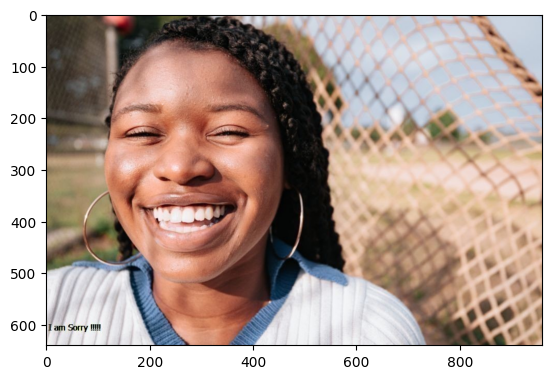

In [11]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_RGB2BGR))

In [12]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir,image_class)):
        image_path = os.path.join(data_dir,image_class,image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print(f'Image not in ext list {image_path}')
                os.remove(image_path)
        except Exception as e:
            print(f'Issue with image {image_path}')

In [13]:
tf.data.Dataset.list_files??

Signature:
tf.data.Dataset.list_files(
    file_pattern,
    shuffle=None,
    seed=None,
    name=None,
) -> 'DatasetV2'
Source:   
  @staticmethod
  def list_files(
      file_pattern, shuffle=None, seed=None, name=None
  ) -> "DatasetV2":
    """A dataset of all files matching one or more glob patterns.

    The `file_pattern` argument should be a small number of glob patterns.
    If your filenames have already been globbed, use
    `Dataset.from_tensor_slices(filenames)` instead, as re-globbing every
    filename with `list_files` may result in poor performance with remote
    storage systems.

    Note: The default behavior of this method is to return filenames in
    a non-deterministic random shuffled order. Pass a `seed` or `shuffle=False`
    to get results in a deterministic order.

    Example:
      If we had the following files on our filesystem:

        - /path/to/dir/a.txt
        - /path/to/dir/b.py
        - /path/to/dir/c.py

      If we pass "/path/to/dir/*.py" as 

In [14]:
tf.keras.utils.image_dataset_from_directory??

Signature:
tf.keras.utils.image_dataset_from_directory(
    directory,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)
Source:   
@keras_export(
    [
        "keras.utils.image_dataset_from_directory",
        "keras.preprocessing.image_dataset_from_directory",
    ]
)
def image_dataset_from_directory(
    directory,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    ve

In [15]:
picture = tf.keras.utils.image_dataset_from_directory('picture')

Found 186 files belonging to 2 classes.


In [16]:
picture_iterator = picture.as_numpy_iterator()
picture_iterator

NumpyIterator(iterator=<tensorflow.python.data.ops.iterator_ops.OwnedIterator object at 0x0000019F8F536D20>)

In [17]:
# Images representer as numy as np
batch = picture_iterator.next()
batch

(array([[[[9.23437500e+00, 3.12343750e+01, 4.52343750e+01],
          [1.32812500e+00, 2.29921875e+01, 3.69921875e+01],
          [0.00000000e+00, 2.10000000e+01, 3.80000000e+01],
          ...,
          [0.00000000e+00, 1.90000000e+01, 3.60000000e+01],
          [1.34887695e-01, 1.73380127e+01, 3.73380127e+01],
          [0.00000000e+00, 1.82031250e+01, 3.72031250e+01]],
 
         [[9.50573730e+00, 3.15057373e+01, 4.55057373e+01],
          [1.32812500e+00, 2.29921875e+01, 3.69921875e+01],
          [0.00000000e+00, 2.10000000e+01, 3.80000000e+01],
          ...,
          [0.00000000e+00, 2.02187500e+01, 3.72187500e+01],
          [2.59399414e-01, 1.98828125e+01, 3.92734375e+01],
          [0.00000000e+00, 1.96093750e+01, 3.86093750e+01]],
 
         [[9.67968750e+00, 3.16796875e+01, 4.56796875e+01],
          [1.33850098e+00, 2.30025635e+01, 3.70025635e+01],
          [1.20849609e-02, 2.10120850e+01, 3.80120850e+01],
          ...,
          [1.00000000e+00, 2.20000000e+01, 3.9000

In [18]:
batch[0].shape

(32, 256, 256, 3)

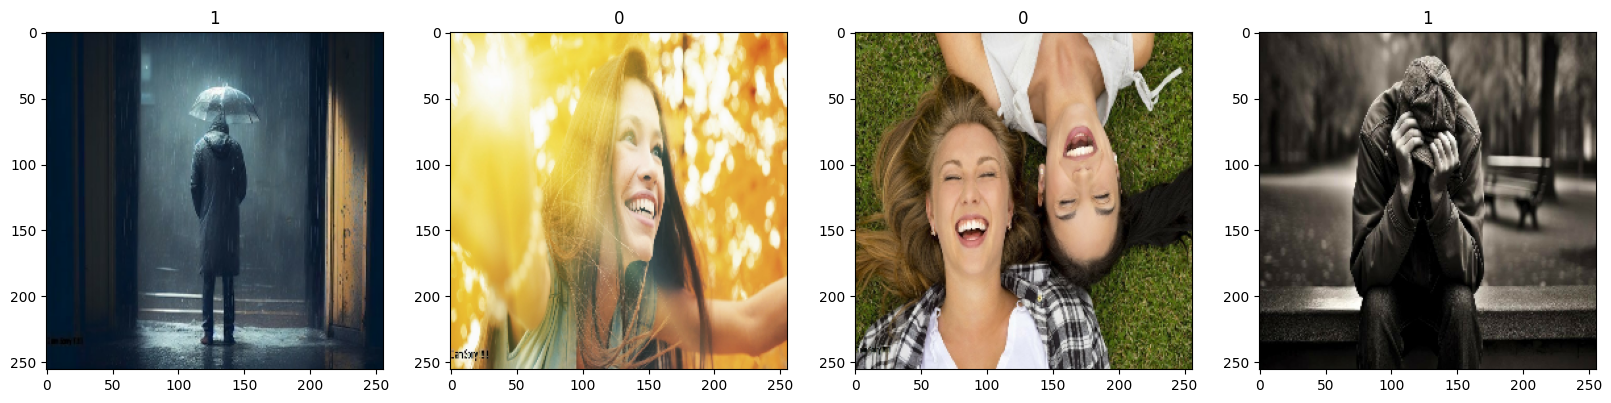

In [19]:
fig,ax = plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [20]:
picture = picture.map(lambda x,y:(x/255,y))

In [26]:
scaled_iterator = picture.as_numpy_iterator()

In [28]:
scaled_iterator.next()[0].max()

1.0

In [30]:
len(picture)

6

In [31]:
train_size = int(len(picture)*.7)
val_size = int(len(picture)*.2)+1
test_size = int(len(picture)*.1)+1

In [33]:
train_size+val_size+test_size

7

In [34]:
train = picture.take(train_size)
val = picture.skip(train_size).take(val_size)
test = picture.skip(train_size+val_size).take(test_size)

## Deep 

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout

In [41]:
model = Sequential()

In [43]:
MaxPooling2D??

Init signature:
MaxPooling2D(
    pool_size=(2, 2),
    strides=None,
    padding='valid',
    data_format=None,
    name=None,
    **kwargs,
)
Source:        
@keras_export(["keras.layers.MaxPooling2D", "keras.layers.MaxPool2D"])
class MaxPooling2D(BasePooling):
    """Max pooling operation for 2D spatial data.

    Downsamples the input along its spatial dimensions (height and width)
    by taking the maximum value over an input window
    (of size defined by `pool_size`) for each channel of the input.
    The window is shifted by `strides` along each dimension.

    The resulting output when using the `"valid"` padding option has a spatial
    shape (number of rows or columns) of:
    `output_shape = math.floor((input_shape - pool_size) / strides) + 1`
    (when `input_shape >= pool_size`)

    The resulting output shape when using the `"same"` padding option is:
    `output_shape = math.floor((input_shape - 1) / strides) + 1`

    Args:
        pool_size: int or tuple of 2 integers

In [42]:
model.add(Conv2D(16,(3,3),1,activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [48]:
model.compile(optimizer='adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [50]:
254/2

127.0

In [52]:
30*30*16

14400

In [49]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 60, 60, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 28800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │     7,373,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,387,649 (28.18 MB)

 Trainable params: 7,387,649 (28.18 MB)

 Non-trainable params: 0 (0.00 B)

In [53]:
logdir = 'logs'

In [56]:
tensorboard_callvback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [57]:
hist = model.fit(train,epochs=20,validation_data=val,callbacks=[tensorboard_callvback])

Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 8s 939ms/step - accuracy: 0.5969 - loss: 1.8183 - val_accuracy: 0.3621 - val_loss: 0.9925
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.3740 - loss: 0.9069 - val_accuracy: 0.4828 - val_loss: 0.6911
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.5479 - loss: 0.7157 - val_accuracy: 0.7414 - val_loss: 0.5522
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.8104 - loss: 0.5413 - val_accuracy: 0.8966 - val_loss: 0.4175
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.8219 - loss: 0.4005 - val_accuracy: 0.8621 - val_loss: 0.3248
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.8208 - loss: 0.3826 - val_accuracy: 0.8793 - val_loss: 0.3440
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.7760 - loss: 0.3843 - val_accuracy: 0.9655 - val_loss: 0.1835
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.9021 - loss: 0.2616 - val_accuracy: 0.9310 - val_loss: 0.1768
Epoch 9/20
4/

In [61]:
hist.history

{'accuracy': [0.546875,
  0.4453125,
  0.578125,
  0.84375,
  0.8359375,
  0.84375,
  0.8125,
  0.8984375,
  0.9375,
  0.9609375,
  0.96875,
  1.0,
  0.984375,
  1.0,
  1.0,
  0.9921875,
  1.0,
  1.0,
  1.0,
  1.0],
 'loss': [1.8427815437316895,
  0.806080162525177,
  0.7004598379135132,
  0.5201079845428467,
  0.3866714537143707,
  0.34722837805747986,
  0.3442087471485138,
  0.2480640858411789,
  0.20376825332641602,
  0.14280292391777039,
  0.09972117841243744,
  0.06199522688984871,
  0.05526748299598694,
  0.02108466625213623,
  0.016731077805161476,
  0.017558664083480835,
  0.013572350144386292,
  0.010754862800240517,
  0.00782187469303608,
  0.007963665761053562],
 'val_accuracy': [0.36206895112991333,
  0.48275861144065857,
  0.7413793206214905,
  0.8965517282485962,
  0.8620689511299133,
  0.8793103694915771,
  0.9655172228813171,
  0.931034505367279,
  1.0,
  0.982758641242981,
  0.9655172228813171,
  0.982758641242981,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0

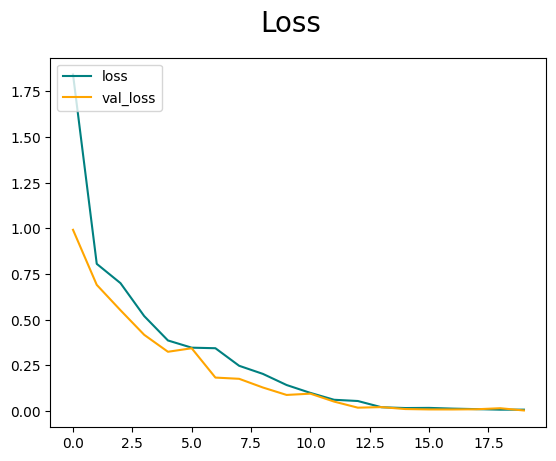

In [66]:
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')

fig = plt.gcf()

fig.suptitle('Loss', fontsize=20)

plt.legend(loc='upper left')

plt.show()

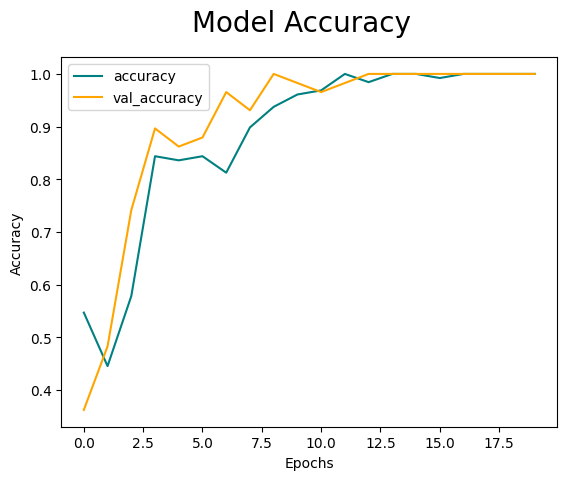

In [71]:
import matplotlib.pyplot as plt

fig = plt.figure()

plt.plot(hist.history['accuracy'], color='teal', label='accuracy')

plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')

fig.suptitle('Model Accuracy', fontsize=20)

plt.xlabel('Epochs')

plt.ylabel('Accuracy')

plt.legend(loc='upper left')

plt.show()

## Ecaluation

In [73]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [79]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [83]:
for batch in test.as_numpy_iterator():
    X,y = batch
    yhat = model.predict(X)
    pre.update_state(y,yhat)
    re.updata_state(y,yhat)
    acc.updata_state(y,yhat)

print(f'Precisotn:{pre.result().numpy()},Recall:{re.result().numpy()},Accuracy:{acc.result().numpy()}')

Precisotn:0.0,Recall:0.0,Accuracy:0.0


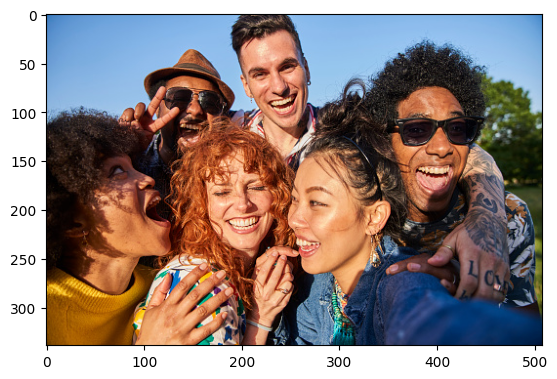

In [86]:
import cv2 
img = cv2.imread('happytets.jpg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

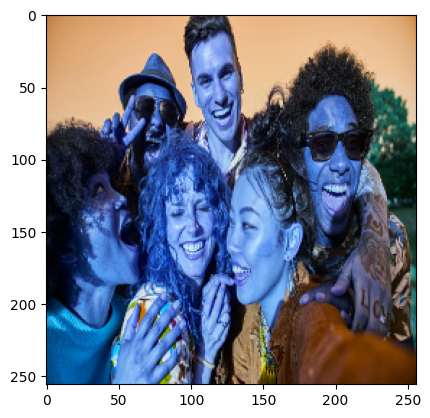

In [89]:
resize = tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [92]:
resize

<tf.Tensor: shape=(256, 256, 3), dtype=float32, numpy=
array([[[1.82390915e+02, 1.16898727e+02, 5.03752899e+01],
        [1.87200089e+02, 1.20200089e+02, 5.72000885e+01],
        [1.90171371e+02, 1.24171371e+02, 5.91713715e+01],
        ...,
        [2.03623047e+02, 1.39623047e+02, 7.56230469e+01],
        [1.98838760e+02, 1.35838760e+02, 6.78387604e+01],
        [1.95470703e+02, 1.30470703e+02, 6.15504913e+01]],

       [[1.85217880e+02, 1.19725693e+02, 5.32022552e+01],
        [1.89194656e+02, 1.22194656e+02, 5.91946564e+01],
        [1.92171432e+02, 1.25685104e+02, 6.16577606e+01],
        ...,
        [2.05433594e+02, 1.41433594e+02, 7.74335938e+01],
        [2.01925781e+02, 1.38439453e+02, 7.18984375e+01],
        [1.98478302e+02, 1.33957031e+02, 6.56961823e+01]],

       [[1.86794922e+02, 1.21302734e+02, 5.47792969e+01],
        [1.90377396e+02, 1.23377396e+02, 6.03773956e+01],
        [1.92985199e+02, 1.27106033e+02, 6.37324219e+01],
        ...,
        [2.07334808e+02, 1.44082

In [93]:
np.expand_dims(resize/255,0)

array([[[[7.1525848e-01, 4.5842639e-01, 1.9755016e-01],
         [7.3411798e-01, 4.7137290e-01, 2.2431408e-01],
         [7.4577010e-01, 4.8694655e-01, 2.3204459e-01],
         ...,
         [7.9852176e-01, 5.4754138e-01, 2.9656097e-01],
         [7.7975982e-01, 5.3270102e-01, 2.6603436e-01],
         [7.6655179e-01, 5.1164979e-01, 2.4137448e-01]],

        [[7.2634465e-01, 4.6951252e-01, 2.0863630e-01],
         [7.4193984e-01, 4.7919473e-01, 2.3213591e-01],
         [7.5361347e-01, 4.9288276e-01, 2.4179514e-01],
         ...,
         [8.0562192e-01, 5.5464154e-01, 3.0366114e-01],
         [7.9186583e-01, 5.4289979e-01, 2.8195465e-01],
         [7.7834630e-01, 5.2532166e-01, 2.5763208e-01]],

        [[7.3252910e-01, 4.7569701e-01, 2.1482077e-01],
         [7.4657804e-01, 4.8383293e-01, 2.3677410e-01],
         [7.5680470e-01, 4.9845502e-01, 2.4993107e-01],
         ...,
         [8.1307769e-01, 5.6502759e-01, 3.1404719e-01],
         [7.9604363e-01, 5.4809284e-01, 2.9470569e-01],
  

In [95]:
resize.shape

TensorShape([256, 256, 3])

In [91]:
import numpy as np
yhat = model.predict(np.expand_dims(resize/255,0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 510ms/step


In [96]:
yhat

array([[0.8750644]], dtype=float32)

In [98]:
if yhat > 0.5:
    print(f'prediction class is happy')
else:
    print(f'prediction class is sad')

prediction class is happy


## Save the model 

In [102]:
from tensorflow.keras.models import load_model

In [104]:
model.save(os.path.join('model','happysadmodel.h5'))

In [106]:
os.path.join('model','happysadmodel.h5')

'model\\happysadmodel.h5'

In [107]:
new_model = load_model(os.path.join('model','happysadmodel.h5'))

In [109]:
new_model

<Sequential name=sequential_2, built=True>

In [111]:
yhat_new = new_model.predict(np.expand_dims(resize/255,0))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


In [113]:
if yhat_new > 0.5:
    print(f'Predicted class is happy')
else:
    print(f'Predicted class is sad')  

Predicted class is happy
